## Uygulamalı Veri Bilimi ve Makine Öğrenimi Eğitim Kampı 

### Kodluyoruz Ağustos-Eylül 2019 Ankara

### 3. hafta

Geçtiğimiz hafta istatistik temellerine değindik

Anahtar kelimeler:
* Z Table
* Normal dağılım (Gaussian) (çan)
* Uniform dağılım
* Poisson dağılımı
* Probability Density Function (PDF)
* Cumulative Distribution Function (CDF)


## Dataset

### Imports

#### Linear Regression

Assumptions:
* Random Error Term
* Normal error term with mean = 0, constant variance
* Error terms are uncorrelated ( value of one error term does not depend on th evalue of other error terms)

Least Squares Estimation (LSE Method)

Maximum Likelihood Estimation (MLE Method)

#### Multiple Linear Regression

Assumptions:
* Random Error Term
* Normal error term with mean = 0, constant variance
* Error terms are uncorrelated ( value of one error term does not depend on th evalue of other error terms)
* Independent variables are linearly independent (Multicollinearity)

### Linearity (Doğrusallık)

Regresyon modelleri parametrelerine göre doğrusaldır

Doğrusal olmayan bir modelin logaritmasını (ln) alarak doğrusal modele dönüşütürülebilir 

Doğrusala dönüştürülemeyen örneğin kategorik sınıflar için logistic Regression kullanılabilir

In [82]:
import numpy as np
import math
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pylab
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

from scipy.stats import shapiro

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
%matplotlib inline

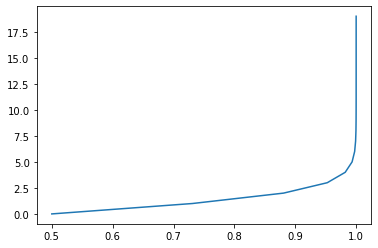

In [2]:
n=np.arange(0,20)
u=[]
for i in range(0,20):
    u.append((math.exp(i))/(1+math.exp(i)))
plt.plot(u,n)

### Dataset

In [3]:
ad=pd.read_csv('Advertising.csv',usecols=[1,2,3,4])
df=ad.copy()
#data=pd.read_csv('https://raw.githubusercontent.com/caglarmert/UVBMOB/master/titanic_train.csv') # veriseti yoksa internetten çekmek için

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


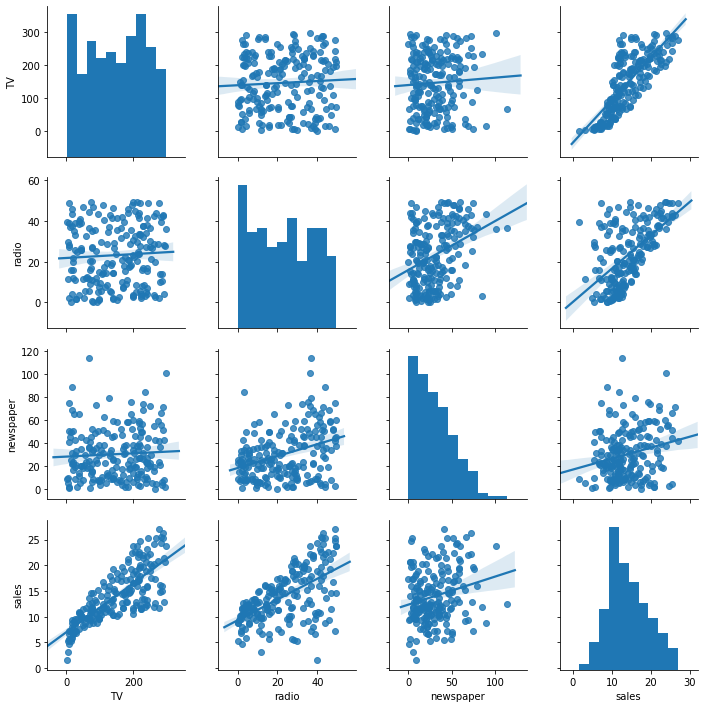

In [7]:

sns.pairplot(df,kind="reg")

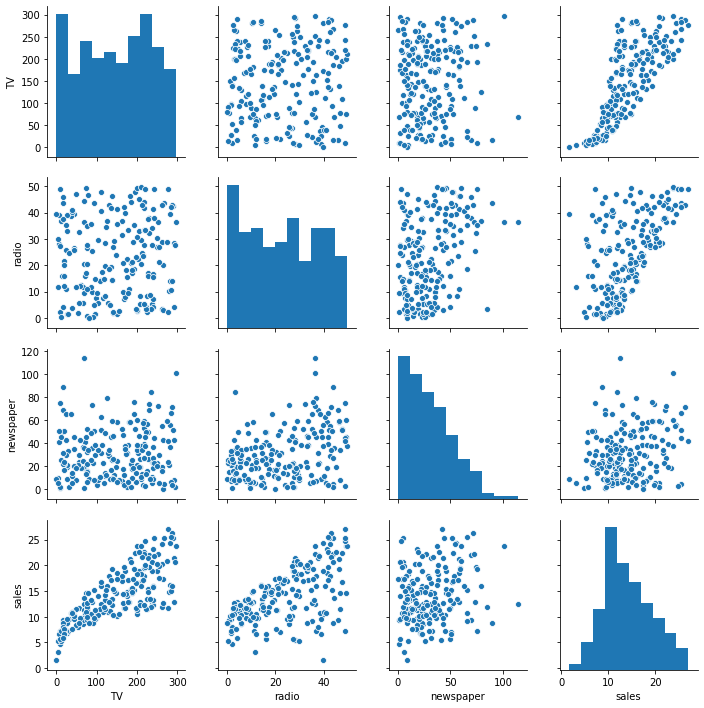

In [8]:
sns.pairplot(df,kind="scatter")

In [9]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


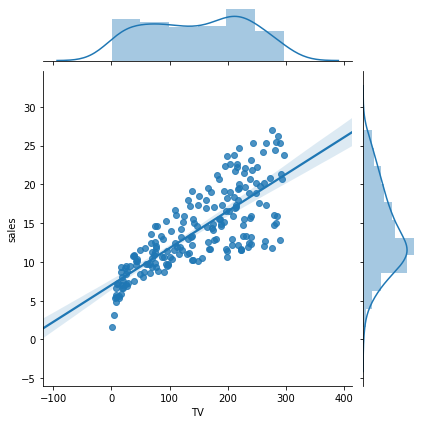

In [10]:
sns.jointplot(x=df['TV'],y=df['sales'],kind='reg')

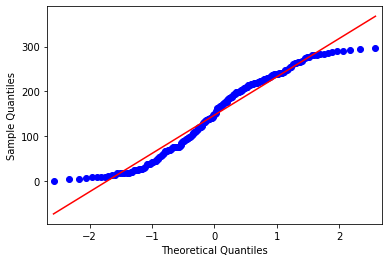

In [11]:
sm.qqplot(df['TV'],line='s')
pylab.show()

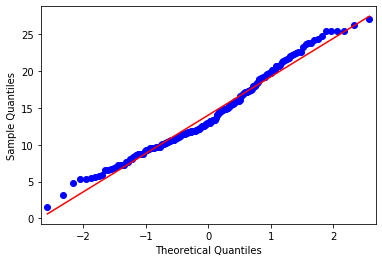

In [12]:
sm.qqplot(df['sales'],line='s')
pylab.show()

In [13]:
X=df[['TV']]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [14]:
X = sm.add_constant(X)
X[0:5]

d:\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [15]:
y = df['sales']
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [16]:
lm = sm.OLS(y,X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 08 Sep 2019   Prob (F-statistic):           1.47e-42
Time:                        13:14:23   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

sales=7.0326+0.0475 TV

Adj. R-squared:	0.610
F-statistic:	312.1

In [17]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 08 Sep 2019   Prob (F-statistic):           1.47e-42
Time:                        13:14:23   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [19]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [20]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [21]:
model.f_pvalue
print("f_pvalue          :" , "%.4f" % model.f_pvalue)
print("f value           :" , "%.2f" % model.fvalue)
print("Intercept t value :" , "%.2f" % model.tvalues[0:1])
print("TV t value        :" , "%.2f" % model.tvalues[1:2])

f_pvalue          : 0.0000
f value           : 312.14
Intercept t value : 15.36
TV t value        : 17.67


In [22]:
model.rsquared_adj

0.6099148238341623

In [23]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [24]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [25]:
X['TV'][0:5]

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [26]:
y_predicted=[]
for i in range(len(y)):
    y_predicted.append(X['TV'][i]*float(model.params[1])+float(model.params[0]))

In [27]:
y_predicted[0:5]

[17.970774512765537,
 9.147974048397073,
 7.8502237645756345,
 14.234394574730185,
 15.627218139417664]

In [28]:
diff=y_predicted-y

In [29]:
diff[0:5]

0   -4.129225
1   -1.252026
2   -1.449776
3   -4.265605
4    2.727218
Name: sales, dtype: float64

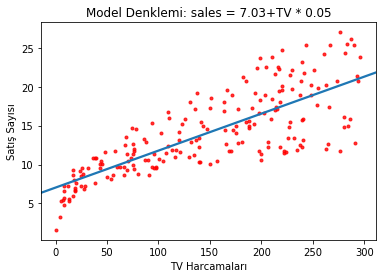

In [30]:
g = sns.regplot(df['TV'],df['sales'], ci=None, scatter_kws={'color':'red','s':9})
g.set_title('Model Denklemi: sales = 7.03+TV * 0.05')
g.set_ylabel('Satış Sayısı')
g.set_xlabel('TV Harcamaları')
fig = g.get_figure()
fig.savefig("output.png")

In [31]:

X = df[['TV']]
y= df['sales']
reg = LinearRegression()
model= reg.fit(X,y)

In [32]:
model.intercept_

7.032593549127695

In [33]:
model.coef_[0]

0.04753664043301975

In [34]:
model.score(X,y)

0.611875050850071

In [35]:
prediction=model.predict(X)
prediction[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [36]:
error_df=prediction-y

In [37]:
error_arr=error_df.values

In [38]:
error_df.var()

10.565480317242969

In [39]:
error_df.abs().mean()

2.549806038927486

In [40]:
print(" 30 TV reklamına karşılık gelen satış: " + str(float(model.predict([[30]]))))

 30 TV reklamına karşılık gelen satış: 8.458692762118288


In [41]:
lm = smf.ols("sales ~TV",df)
model= lm.fit()
model.summary()
mse= mean_squared_error(y, model.fittedvalues)
mse

10.512652915656757

In [42]:
mse/model.fittedvalues.mean()

0.7496989064472638

In [43]:
import numpy as np

In [44]:
rmse=np.sqrt(mse)
print(rmse)
reg.predict(X)[0:10]
print(y[0:10])


3.2423221486546887
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64


In [45]:
k_t = pd.DataFrame({'gercek_y':y[0:10],'tahmin_y':reg.predict(X)[0:10]})

In [46]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [47]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [48]:
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [49]:
np.sum(k_t["hata_kare"])

92.90350329638102

In [50]:
model.resid

0      4.129225
1      1.252026
2      1.449776
3      4.265605
4     -2.727218
         ...   
195   -1.248493
196   -1.810545
197   -2.646579
198    4.986015
199   -4.665848
Length: 200, dtype: float64

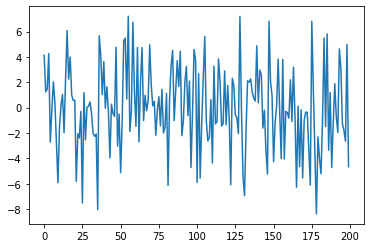

In [51]:
plt.plot(model.resid)

In [52]:
print (np.sum(k_t['hata_kare']))
print (np.mean(k_t['hata_kare']))
print (np.average(((k_t['hata']).abs())))
print (np.sqrt(np.mean(k_t['hata_kare'])))

92.90350329638102
9.290350329638102
2.5129388421137904
3.048007599996775


## Multivariate Regression

In [53]:
ad = pd.read_csv("Advertising.csv",usecols=[1,2,3,4])
df = ad.copy()



In [54]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [55]:
X = df.drop('sales', axis=1)
y = df['sales']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.20, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
training = df.copy()
print(training.shape)

(160, 3)
(40, 3)
(160,)
(40,)
(200, 4)


In [56]:
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Sun, 08 Sep 2019   Prob (F-statistic):                   1.28e-137
Time:                        13:14:24   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

sales = 0.0531 * TV+0.2188 * radio+0.0239 * newspaper

In [57]:
a="Sales = "
for i in range(len(model.params)):
    a=a+(str(model.params.index[i]) + "*" + '%.4f'%(model.params[i])+ " + ")
print(a)

Sales = TV*0.0531 + radio*0.2188 + newspaper*0.0239 + 


 Leverage v.s. Studentized Residuals


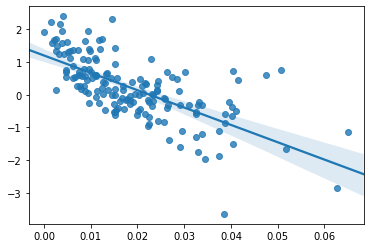

In [111]:
#detect outliers
# cooks distance kullanılacak
influence = model.get_influence()
resid_student = influence.resid_studentized_external
(cooks,p)=influence.cooks_distance
(dffits,p)=influence.dffits
leverage = influence.hat_matrix_diag

print( ' Leverage v.s. Studentized Residuals')
sns.regplot(leverage, model.resid_pearson, fit_reg=True)

plt.show()

In [59]:
advres=pd.concat([ad, pd.Series(model.resid, name = "resid"),
                  pd.Series(model.predict(), name = "predict" )], axis=1)

In [60]:
advres.head()

,TV,radio,newspaper,sales,resid,predict
0,230.1,37.8,69.2,22.1,-0.041335,8.396375
1,44.5,39.3,45.1,10.4,-1.637545,11.587710
2,17.2,45.9,69.3,9.3,-3.308953,8.967927
3,151.5,41.3,58.5,18.5,0.022542,6.501963
4,180.8,10.8,58.4,12.9,-0.458176,12.793680


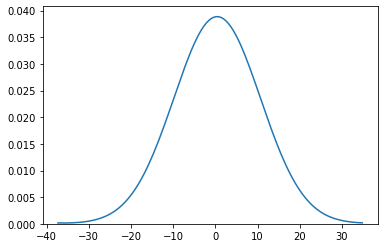

In [110]:
sns.kdeplot(np.array(advres.resid),bw=10,legend=True)
plt.show()

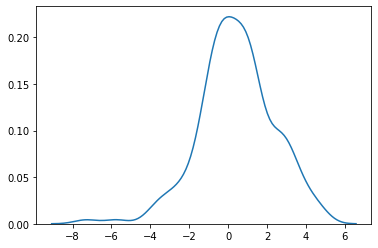

In [109]:
sns.distplot(np.array(advres.resid),hist=False)
plt.show()

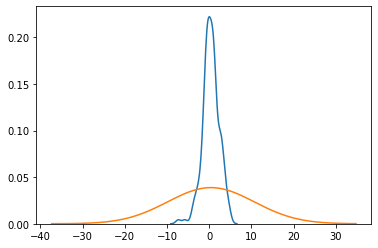

In [108]:
sns.distplot(np.array(advres.resid),hist=False)
sns.kdeplot(np.array(advres.resid),bw=10,legend=True)
plt.show()

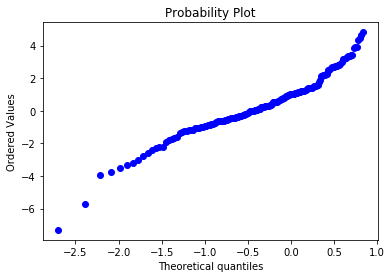

In [79]:
stats.probplot(advres.resid, dist="norm", plot=pylab)
pylab.show()

In [103]:
stat, p = shapiro (advres.resid.dropna())

In [115]:
print('Statictics=%.3f, p=%.3f' %(stat,p))

alpha=0.5
if p >alpha:
    print('Orneklem Normal (Gaussian) dağılımdan gelmektedir, (Fail to reject)')  
else:
    print('Orneklem Normal (Gaussian) dağılım göstermemektedir, (Reject)')

Statictics=0.977, p=0.274
Orneklem Normal (Gaussian) dağılım göstermemektedir, (Reject)


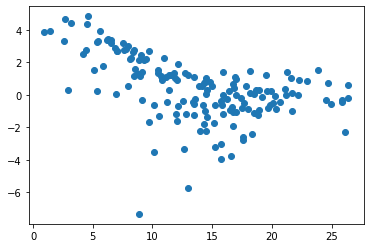

In [107]:
resid=model.resid
plt.scatter(model.predict(),resid)
plt.show()

In [113]:
lm = smf.ols("sales ~TV+newspaper+radio", df).fit()
lm.summary()

In [116]:
y, X = dmatrices("sales ~TV+newspaper+radio",data=df , return_type="dataframe")